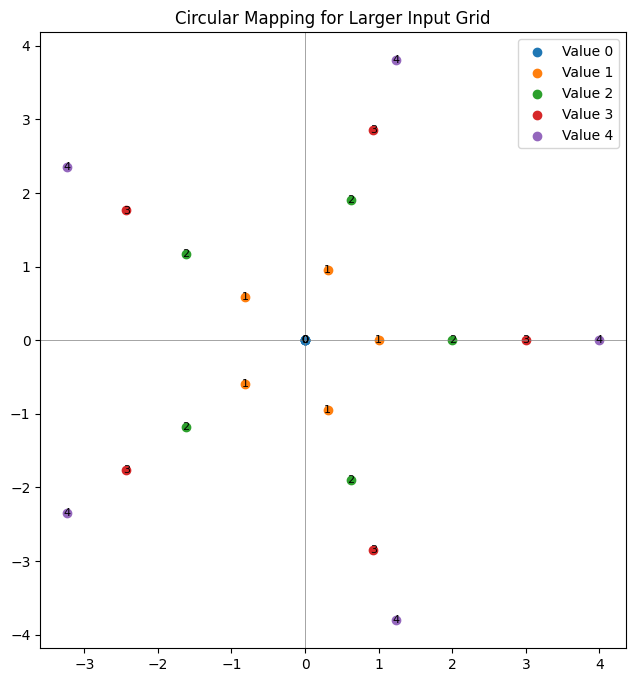

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

def process_input(input_grid):
    """
    Process the input grid to get unique values and their counts.
    """
    # Flatten the input grid and count occurrences
    input_flat = np.array(input_grid).flatten()
    counts = Counter(input_flat)
    return input_flat, counts

def map_to_circles(values, counts):
    """
    Map values in the input to circles based on their value (radius) and position.
    """
    coordinates = {}
    
    for value in counts:
        n = counts[value]  # Number of occurrences of the value
        radius = value  # Radius corresponds to the value
        theta_increment = 2 * np.pi / n if n > 0 else 0  # Equal angular spacing
        
        # Calculate positions for each occurrence
        positions = [
            (radius * np.cos(i * theta_increment), radius * np.sin(i * theta_increment))
            for i in range(n)
        ]
        coordinates[value] = positions
    
    return coordinates

def visualize_circles(coordinates, title="Circular Mapping"):
    """
    Visualize the circular mapping of values.
    """
    plt.figure(figsize=(8, 8))
    for value, positions in coordinates.items():
        x, y = zip(*positions)
        plt.scatter(x, y, label=f"Value {value}")
        for xi, yi in positions:
            plt.text(xi, yi, str(value), fontsize=8, ha='center', va='center')
    
    plt.axhline(0, color='gray', linewidth=0.5)
    plt.axvline(0, color='gray', linewidth=0.5)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title(title)
    plt.legend()
    plt.show()

# Larger input grid with more values
input_grid = [
    [0, 1, 2, 3, 4],
    [1, 2, 3, 4, 0],
    [2, 3, 4, 0, 1],
    [3, 4, 0, 1, 2],
    [4, 0, 1, 2, 3]
]

# Process the input
input_flat, input_counts = process_input(input_grid)

# Map the input values to circles
input_coordinates = map_to_circles(input_flat, input_counts)

# Visualize the results
visualize_circles(input_coordinates, title="Circular Mapping for Larger Input Grid")


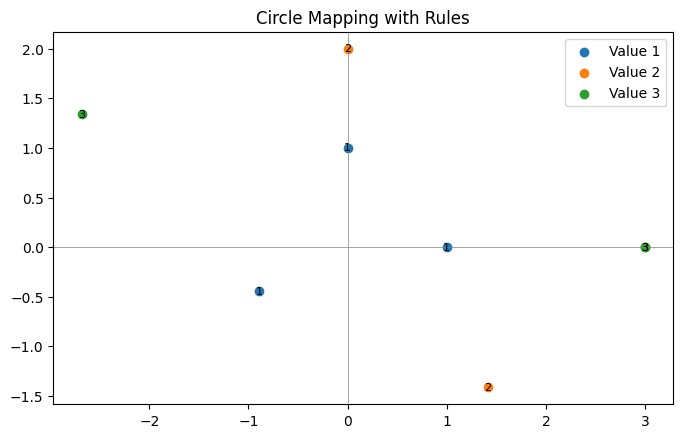

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def map_to_circle_with_rules(input_grid):
    input_array = np.array(input_grid)
    rows, cols = input_array.shape
    circle_points = defaultdict(list)

    # Loop through the grid
    for r in range(rows):
        for c in range(cols):
            value = input_array[r, c]
            if value == 0:
                continue  # Skip empty cells

            # Calculate radius based on value
            radius = value
            
            # Determine angular position
            # Start with a default angle based on position in grid
            base_angle = np.arctan2(r - rows // 2, c - cols // 2)
            
            # Check adjacency for alignment
            if r > 0 and input_array[r-1, c] == value:  # Align vertically
                base_angle = np.pi / 2
            elif c > 0 and input_array[r, c-1] == value:  # Align horizontally
                base_angle = 0

            # Calculate position on the circle
            x = radius * np.cos(base_angle)
            y = radius * np.sin(base_angle)
            circle_points[value].append((x, y))
    
    return circle_points

def visualize_circle_with_rules(circle_points, title="Circle Mapping with Rules"):
    plt.figure(figsize=(8, 8))
    for value, points in circle_points.items():
        x, y = zip(*points)
        plt.scatter(x, y, label=f"Value {value}")
        for xi, yi in points:
            plt.text(xi, yi, str(value), fontsize=8, ha='center', va='center')
    
    plt.axhline(0, color='gray', linewidth=0.5)
    plt.axvline(0, color='gray', linewidth=0.5)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.title(title)
    plt.show()

# Example input grid
input_grid = [
    [1, 1, 0, 2],
    [1, 0, 0, 2],
    [3, 3, 3, 0]
]

# Map grid to circle
circle_points = map_to_circle_with_rules(input_grid)

# Visualize the mapping
visualize_circle_with_rules(circle_points)
